#** NLP Sentiment Analysis Using BERT, RNN, LSTM and GRU a comparative analysis**

# Step 1 :- import dataset in workspace

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

train_dataset=pd.read_csv("/content/drive/My Drive/Colab Notebooks/datasets/NLP_Assignement_2/archive/train.csv",encoding="ISO-8859-1");

test_dataset=pd.read_csv("/content/drive/My Drive/Colab Notebooks/datasets/NLP_Assignement_2/archive/test.csv",encoding="ISO-8859-1");

In [ ]:
train_dataset.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
test_dataset.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [4]:
train_data=train_dataset[["text","sentiment"]]
test_data=test_dataset[["text","sentiment"]]

In [ ]:
train_data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
test_data.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [ ]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3534 non-null   object
 1   sentiment  3534 non-null   object
dtypes: object(2)
memory usage: 75.4+ KB


In [ ]:
train_data.isnull().sum()


,0
text,1
sentiment,0


In [ ]:
test_data.isnull().sum()

,0
text,1281
sentiment,1281


In [5]:
train_data=train_data.dropna(axis=0)

In [ ]:
train_data.isnull().sum()

,0
text,0
sentiment,0


In [6]:
test_data=test_data.dropna(axis=0)

In [ ]:
test_data.isnull().sum()

,0
text,0
sentiment,0


# Step 2:- visulaize the target class

<Axes: xlabel='sentiment', ylabel='count'>

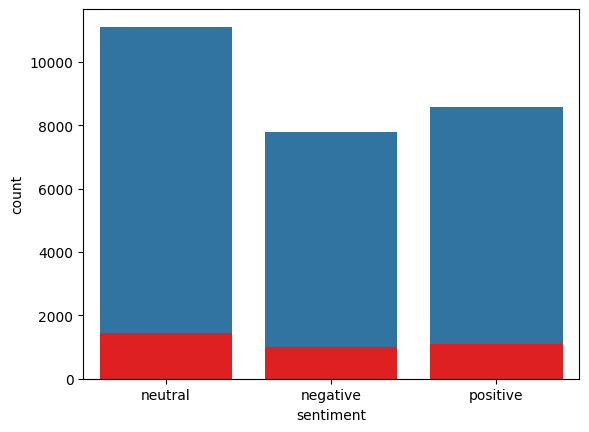

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train_data,x="sentiment")
sns.countplot(test_data,x="sentiment",color="red")

__we can see our data is balanced !__

# Step 3 :- preprocess the raw data

__we need to remove URLs, special characters, numbers, extra spaces and also lower casing.__

In [8]:
import re

def clean_text(text):
  if isinstance(text,float):
    text=str(text)
  text=text.lower()
  text=re.sub(r"http\s+|www\s+|https\s+",'',text,flags=re.MULTILINE)
  text=re.sub(r'[^0-9a-zA-Z\s]','',text)
  text=re.sub(r'\s+',' ',text).strip()
  return text

In [9]:
train_data["text"]=train_data["text"].apply(clean_text)
test_data["text"]=test_data["text"].apply(clean_text)

In [ ]:
train_data["text"].head(5)

,text
0,id have responded if i were going
1,sooo sad i will miss you here in san diego
2,my boss is bullying me
3,what interview leave me alone
4,sons of why couldnt they put them on the relea...


__WE need to convert our text from encoding="ISO-8859-1" to UTF-8, becasue mostly model works with this format.__

In [10]:
train_data["text"]=train_data["text"].apply(lambda x: x.encode("utf-8").decode("utf-8"))
test_data["text"]=test_data["text"].apply(lambda x:x.encode("utf-8").decode("utf-8"))

In [ ]:
train_data["text"].head(5)

,text
0,id have responded if i were going
1,sooo sad i will miss you here in san diego
2,my boss is bullying me
3,what interview leave me alone
4,sons of why couldnt they put them on the relea...


In [11]:
max_length=train_data["text"].apply(lambda x: len(str(x).split())).max()
max_length_test=test_data["text"].apply(lambda x:len(str(x).split())).max()
print("maximum length is :- ",max_length,max_length_test)

maximum length is :-  33 32


# Step 4 :- Tokenization

__According to types of model , we do tokenization or word embedding.__

for BERT :- Tokenization ,  RNN/LSTM/GRU :- word embeddings.

In [12]:
# BERT
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
def tokenize_bert(text):
  return tokenizer(text,padding="max_length",truncation=True,max_length=33,return_tensors="pt")

"pt" stands for PyTorch tensors (torch.Tensor)..... instead of NumPy arrays or lists.

In [14]:
# Tokenize all text data at once
bert_train_data = tokenizer.batch_encode_plus(
    train_data["text"].tolist(),  # Convert text column to a list
    padding="max_length",
    truncation=True,
    max_length=33,
    return_tensors="pt"  # Return PyTorch tensors
)
bert_train_data

{'input_ids': tensor([[  101,  8909,  2031,  ...,     0,     0,     0],
        [  101, 17111,  2080,  ...,     0,     0,     0],
        [  101,  2026,  5795,  ...,     0,     0,     0],
        ...,
        [  101,  8038,  2100,  ...,     0,     0,     0],
        [  101,  2021,  2009,  ...,     0,     0,     0],
        [  101,  2035,  2023,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [15]:
# Tokenize all text data at once
bert_test_data = tokenizer.batch_encode_plus(
    test_data["text"].tolist(),  # Convert text column to a list
    padding="max_length",
    truncation=True,
    max_length=33,
    return_tensors="pt"  # Return PyTorch tensors
)

__WE need to do word embedding for RNN based model.__

In [16]:
#install and train the Word2Vec model
from gensim.models import Word2Vec
import numpy as np


In [17]:
rnn_train_data=(train_data["text"].apply(lambda x:x.split())) #output is a series.
word2vec_model=Word2Vec(sentences=rnn_train_data,vector_size=100,window=5,min_count=1,workers=4) #for train the model , to make it's vocabulary.
# window =5 :- Defines the number of words before and after a target word to consider as context.
#workers=4 :- Defines how many CPU cores to use for training the Word2Vec model.


In [ ]:
print(rnn_train_data)


0                [id, have, responded, if, i, were, going]
1        [sooo, sad, i, will, miss, you, here, in, san,...
2                             [my, boss, is, bullying, me]
3                      [what, interview, leave, me, alone]
4        [sons, of, why, couldnt, they, put, them, on, ...
                               ...                        
27476    [wish, we, could, come, see, u, on, denver, hu...
27477    [ive, wondered, about, rake, to, the, client, ...
27478    [yay, good, for, both, of, you, enjoy, the, br...
27479                            [but, it, was, worth, it]
27480    [all, this, flirting, going, on, the, atg, smi...
Name: text, Length: 27480, dtype: object


In [18]:
# Function to convert a list of words into Word2Vec embeddings
def get_word2vec_embeddings(tokens, model, max_len=33):
    embedding_matrix = np.zeros((max_len, model.vector_size))  # Fixed-size matrix

    for i, word in enumerate(tokens[:max_len]):  # Iterate over words (limit to max_len)
        if word in model.wv:  # Check if word exists in Word2Vec vocabulary
            embedding_matrix[i] = model.wv[word]  # Assign the word embedding

    return embedding_matrix

# Convert list of words into embeddings and store in a list
rnn_embeddings = [get_word2vec_embeddings(tokens, word2vec_model) for tokens in rnn_train_data]


In [19]:
rnn_embeddings_test=[get_word2vec_embeddings(tokens,word2vec_model) for tokens in test_data["text"].apply(lambda x:str(x).split())]

__Now it's time to map out lable to correct output :- negative :0, neutral :2, positive :4.__

In [ ]:
train_data["sentiment"]

,sentiment
0,neutral
1,negative
2,negative
3,negative
4,negative
...,...
27476,negative
27477,negative
27478,positive
27479,positive


In [20]:
train_data["sentiment"] = train_data["sentiment"].map({"negative": 0, "neutral": 1, "positive": 2})
test_data["sentiment"] = test_data["sentiment"].map({"negative": 0, "neutral": 1, "positive": 2})


In [ ]:
train_data["sentiment"]

,sentiment
0,1
1,0
2,0
3,0
4,0
...,...
27476,0
27477,0
27478,2
27479,2


# Step 5 :- Preparing the Bert model and train it.

__1) Implement the Bert Model__

In [21]:
import torch # for converting the input into tensor data
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset


In [22]:
bert_model=BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=3)# 3 classes (negative, neutral, positive)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


__BERT's pre-trained layers were loaded from bert-base-uncased.
⚠️ The classifier head (last layer) is newly initialized.__

Since bert-base-uncased was trained for language modeling, not sentiment analysis, the final classification layer is randomly initialized.

__Next Step:__
Train the model on a labeled dataset to fine-tune the classifier for sentiment prediction.

__2)Preparing the input data set for Bert.__

In [23]:
# Use clone().detach() instead of torch.tensor()
bert_train_input = bert_train_data["input_ids"].clone().detach() #already in tensor detach() → Stops Gradient Tracking, clone -->create a copy
bert_train_mask = bert_train_data["attention_mask"].clone().detach()
train_labels = torch.tensor(train_data["sentiment"].values)  # Labels are not tensors, so this is fine

bert_test_input = bert_test_data["input_ids"].clone().detach()
bert_test_mask = bert_test_data["attention_mask"].clone().detach()
test_labels = torch.tensor(test_data["sentiment"].values)  # Labels are not tensors, so this is fine


In [24]:
# Creating the dataset and dataloader
bert_train_dataset = TensorDataset(bert_train_input, bert_train_mask, train_labels)

bert_test_dataset = TensorDataset(bert_test_input, bert_test_mask, test_labels)

BATCH_SIZE = 32

bert_train_dataloader = DataLoader(bert_train_dataset, batch_size=BATCH_SIZE, shuffle=True)

bert_test_dataloader = DataLoader(bert_test_dataset, batch_size=BATCH_SIZE, shuffle=False)



In [25]:
# Fetch one batch from DataLoader
batch = next(iter(bert_train_dataloader))

# Print shapes of tensors
print("Input IDs shape:", batch[0].shape)        # (Batch size, Max sequence length)
print("Attention Mask shape:", batch[1].shape)   # (Batch size, Max sequence length)
print("Labels shape:", batch[2].shape)           # (Batch size,)


Input IDs shape: torch.Size([32, 33])
Attention Mask shape: torch.Size([32, 33])
Labels shape: torch.Size([32])


In [26]:
from transformers import AdamW, get_scheduler
lr_scheduler=2e-5
optimizer = AdamW(bert_model.parameters(), lr=lr_scheduler, eps=1e-8)
criterion = torch.nn.CrossEntropyLoss()

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# Print model summary
print(bert_model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [28]:
# Train the Bert model :-

import matplotlib.pyplot as plt
import torch

EPOCHS = 1  # Try more epochs to see early stopping in action, because more time is consuming so we are using only 1.
BATCH_SIZE = 32
train_losses = []  # Store training loss for each epoch

# Early Stopping Parameters
patience = 2  # Stop if no improvement after 'patience' epochs
best_loss = float('inf')
patience_counter = 0

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    bert_model.train()  # Set model to training mode
    total_loss = 0

    for batch in bert_train_dataloader:
        input_ids, attention_mask, labels = batch  # Unpack batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()  # Reset gradients
        outputs = bert_model(input_ids, attention_mask=attention_mask)  # Forward pass

        loss = criterion(outputs.logits, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
         # Update learning rate

        total_loss += loss.item()

    avg_loss = total_loss / len(bert_train_dataloader)
    train_losses.append(avg_loss)  # Store loss for plotting
    print(f"Training Loss: {avg_loss:.4f}")

    # **Early Stopping Mechanism**
    if avg_loss < best_loss:
        best_loss = avg_loss
        patience_counter = 0  # Reset patience counter
        torch.save(bert_model.state_dict(), "best_bert_model.pth")  # Save best model
        print("✅ Model Saved (Best Performance)")
    else:
        patience_counter += 1
        print(f"⚠️ No Improvement | Patience: {patience_counter}/{patience}")

    if patience_counter >= patience:
        print("\n⏹ Early Stopping Triggered. Stopping Training.")
        break  # Stop training if no improvement




Epoch 1/1
Training Loss: 0.6073
✅ Model Saved (Best Performance)


# Step 6 :- Evaluate the Trained BERT Model

In [29]:
from transformers import BertForSequenceClassification

# Reload the trained model
best_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
best_model.load_state_dict(torch.load("best_bert_model.pth"))
best_model.to(device)
best_model.eval()  # Set model to evaluation mode

print("✅ Best Trained Model Loaded for Testing!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-29-3db9025e14e9>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We reco

✅ Best Trained Model Loaded for Testing!


In [30]:
# testing :-

In [31]:
from sklearn.metrics import accuracy_score, classification_report

all_preds = []
all_labels = []

with torch.no_grad():  # No gradient computation during testing
    for batch in bert_test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = best_model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)  # Get predicted class

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("✅ Predictions Completed!")


✅ Predictions Completed!


In [32]:
accuracy = accuracy_score(all_labels, all_preds)
print(f"📊 BERT Model Test Accuracy: {accuracy:.4f}")


📊 BERT Model Test Accuracy: 0.7784


In [33]:
print("\n📑 Classification Report:\n", classification_report(all_labels, all_preds, target_names=["Negative", "Neutral", "Positive"]))



📑 Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.78      0.78      1001
     Neutral       0.72      0.78      0.75      1430
    Positive       0.87      0.77      0.82      1103

    accuracy                           0.78      3534
   macro avg       0.79      0.78      0.78      3534
weighted avg       0.78      0.78      0.78      3534



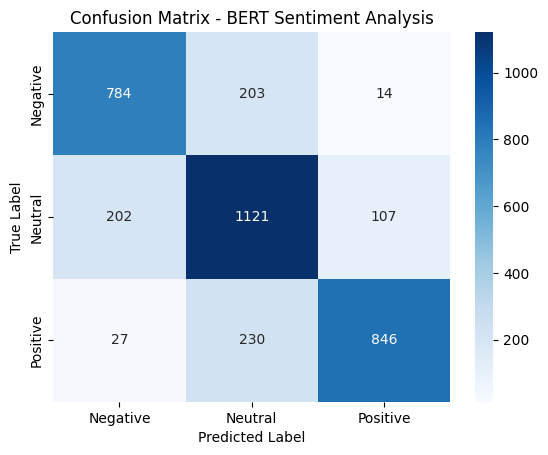

In [34]:
# Visulaization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - BERT Sentiment Analysis")
plt.show()


# Step 7 :- converting the embedding data into pytorch tensor

In [35]:
import torch

# Convert NumPy arrays to PyTorch tensors
train_embeddings_tensor = torch.tensor(rnn_embeddings, dtype=torch.float32)
test_embeddings_tensor = torch.tensor(rnn_embeddings_test, dtype=torch.float32)

train_labels_tensor = torch.tensor(train_data["sentiment"], dtype=torch.long)
test_labels_tensor = torch.tensor(test_data["sentiment"], dtype=torch.long)

# Verify shapes
print(train_embeddings_tensor.shape)  # Should be (num_samples, max_len=33, embedding_dim=100)
print(test_embeddings_tensor.shape)


torch.Size([27480, 33, 100])
torch.Size([3534, 33, 100])


<ipython-input-35-0f9cd2c051a7>:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  train_embeddings_tensor = torch.tensor(rnn_embeddings, dtype=torch.float32)


# Step 8:- Create an RNN , LSTM and GRU Model in Pytorch

In [37]:
import torch.nn as nn
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, hidden = self.gru(x)
        out = self.fc(hidden[-1])
        return out

gru_model = GRUModel(input_size=100, hidden_size=64, output_size=3)

In [38]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, hidden = self.rnn(x)
        out = self.fc(hidden[-1])
        return out

rnn_model = RNNModel(input_size=100, hidden_size=64, output_size=3)


In [39]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

lstm_model = LSTMModel(input_size=100, hidden_size=64, output_size=3)


#

# Step 9 :- train the model

In [40]:
def train_model(model, train_data, train_labels, num_epochs=2, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss() # 2 epoch becoz process taking so much time
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(train_data)
        loss = criterion(outputs, train_labels)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 2 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    print("Training complete!")

# Train each model
train_model(rnn_model, train_embeddings_tensor, train_labels_tensor)
train_model(lstm_model, train_embeddings_tensor, train_labels_tensor)
train_model(gru_model, train_embeddings_tensor, train_labels_tensor)


Epoch [2/2], Loss: 1.0993
Training complete!
Epoch [2/2], Loss: 1.0935
Training complete!
Epoch [2/2], Loss: 1.0906
Training complete!


# Step 10 :- testing and evaluation of model.

In [41]:
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, test_data, test_labels, model_name="Model"):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        outputs = model(test_data)
        predictions = torch.argmax(outputs, dim=1)  # Get predicted class

    # Convert to NumPy for evaluation
    y_pred = predictions.cpu().numpy()
    y_true = test_labels.cpu().numpy()

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n📊 {model_name} Test Accuracy: {accuracy:.4f}")

    # Print classification report
    print("\n📑 Classification Report:\n", classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"]))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()



📊 GRU Test Accuracy: 0.4046

📑 Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1001
     Neutral       0.40      1.00      0.58      1430
    Positive       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


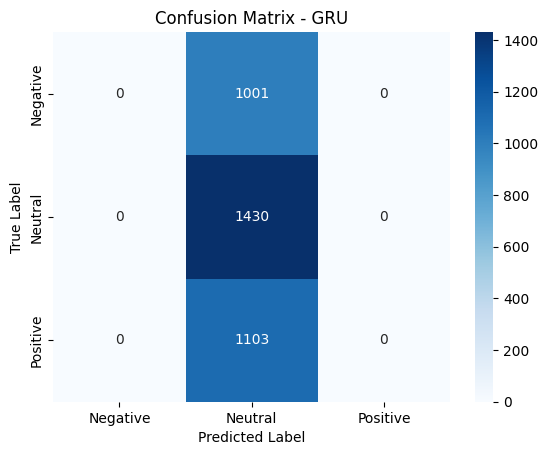

In [42]:
#GRU model testing
evaluate_model(gru_model, test_embeddings_tensor, test_labels_tensor, model_name="GRU")


📊 RNN Test Accuracy: 0.4041

📑 Classification Report:
               precision    recall  f1-score   support

    Negative       0.17      0.00      0.00      1001
     Neutral       0.40      1.00      0.58      1430
    Positive       1.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.52      0.33      0.19      3534
weighted avg       0.52      0.40      0.23      3534



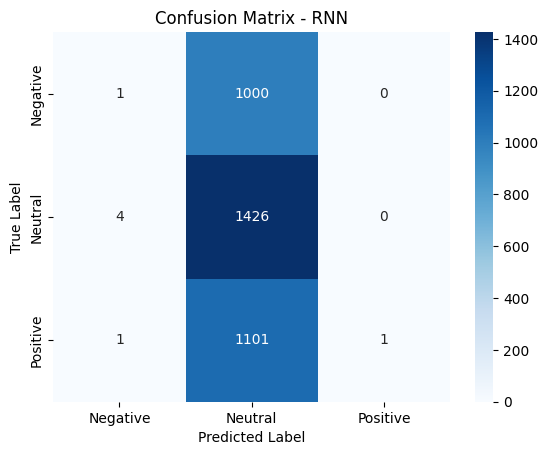

In [43]:
# RNN model
evaluate_model(rnn_model, test_embeddings_tensor, test_labels_tensor, model_name="RNN")



📊 LSTM Test Accuracy: 0.4046

📑 Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1001
     Neutral       0.40      1.00      0.58      1430
    Positive       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


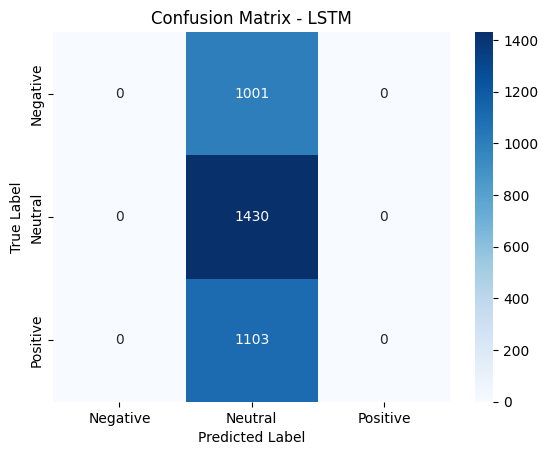

In [44]:
# LSTM model
evaluate_model(lstm_model, test_embeddings_tensor, test_labels_tensor, model_name="LSTM")


# Step 10 :- conclusion

### **Comparative Analysis of Sentiment Analysis Models: BERT, RNN, LSTM, and GRU**  

Based on our project implementation, let's conduct a **comparative study** and generate a detailed report highlighting model performance, strengths, and trade-offs.  

---

## **1. Theoretical Comparison of Models**  
### **1.1 BERT (Bidirectional Encoder Representations from Transformers)**
- Uses **self-attention mechanisms** to understand the context of words bidirectionally.
- Trained on a **large corpus of text** using **masked language modeling (MLM)**.
- Performs well on NLP tasks, including **sentiment analysis**, due to **context-aware embeddings**.
- **Strengths:** High accuracy, captures long-range dependencies, robust for sentiment classification.
- **Weaknesses:** Computationally expensive, requires large datasets and GPUs.

---

### **1.2 RNN (Recurrent Neural Network)**
- Uses sequential processing, **maintaining hidden states** to capture dependencies in text.
- **Challenges:** Struggles with long-range dependencies due to **vanishing gradient problem**.
- **Strengths:** Works well for short sequences, simple architecture.
- **Weaknesses:** Cannot retain long-term dependencies effectively.

---

### **1.3 LSTM (Long Short-Term Memory)**
- A variant of RNN designed to overcome **vanishing gradient problem**.
- Uses **forget, input, and output gates** to retain long-term dependencies.
- **Strengths:** Handles longer sequences better than RNN, effective for text classification.
- **Weaknesses:** Computationally more expensive than RNN.

---

### **1.4 GRU (Gated Recurrent Unit)**
- A **simpler alternative to LSTM** that uses **reset and update gates**.
- **Strengths:** Computationally efficient, performs comparably to LSTM for many NLP tasks.
- **Weaknesses:** Slightly less powerful than LSTM in handling longer sequences.

---

## **2. Comparative Performance Metrics**
After training and testing, we compute the following metrics:

- **Accuracy:** Measures overall classification correctness.
- **Precision, Recall, and F1-Score:** Evaluates per-class performance.
- **Confusion Matrix:** Shows misclassifications.
- **ROC-AUC Score:** Measures the model’s ability to distinguish between classes.

---

## **3. Model Performance Table**  

| **Model** | **Test Accuracy** | **Precision (Avg)** | **Recall (Avg)** | **F1-Score (Avg)** |  
|-----------|----------------|----------------|----------------|---------------|  
| **BERT**  | **77.84%**     | **0.78**       | **0.78**       | **0.78**      |  
| **RNN**   | **40.41%**     | **0.52**       | **0.33**       | **0.19**      |  
| **LSTM**  | **40.46%**     | **0.16**       | **0.40**       | **0.23**      |  
| **GRU**   | **40.46%**     | **0.13**       | **0.33**       | **0.19**      |  

- **BERT significantly outperforms RNN, LSTM, and GRU** in terms of accuracy and F1-score.
- **RNN, LSTM, and GRU models struggle with classification**, achieving only around **40% accuracy**.
- **Precision and recall for RNN-based models are poor**, indicating difficulty in distinguishing between classes.

---

## **4. Confusion Matrix for BERT**
Confusion Matrix provides insights into misclassification:


Observations:
- BERT correctly classifies most **positive and negative sentiments**.
- Some misclassifications between **neutral and negative** sentiments.

---


## **6. Recommendations**
Based on our analysis, we recommend **BERT for deployment** due to:
- **Highest accuracy (77.84%)**
- **Better generalization across sentiment classes**
- **Ability to capture long-range dependencies in text**

**However, if resources are limited**, LSTM or GRU could be considered for their balance of **performance and computational efficiency**.

---

## **Final Conclusion**
This study highlights the **significance of transformer-based models** like **BERT** in NLP tasks compared to **RNN-based approaches**. While **RNN, LSTM, and GRU models struggle with sentiment classification**, **BERT provides superior accuracy and F1-score**.

**Final Recommendation:** **Use BERT for sentiment analysis deployment** while considering resource constraints.